# CSC 496 - Introduction to Machine Learning
## Mid-Term Exam I
**Fall 2025**

### Instructions:
- This is an open notebook exam. You may use your notes and course materials, but external collaboration is not allowed.
- Submit your answers in a single PDF file containing code snippets, outputs (if applicable), and explanations.
- Assume that the dataset is already provided in `X` (features) and `y` (target variable).
- Partial credit will be awarded for incomplete but reasonable attempts.
- There are 6 questions in the exam. Please choose only **5** of them to complete, and add necessary explanations clearly.

## Problem 1 (20 points)
You are working with a **Linear Regression** model to predict house prices. Assume that the dataset is stored in `X` (features) and `y` (target variable).

**Tasks:**
1. Train a **Linear Regression** model using `sklearn.linear_model.LinearRegression` and print the coefficients and intercept.
2. Print the appropriate error metric(s) and discuss what these results indicate about model quality.
3. Suppose your model has high training accuracy but low test accuracy. What might be happening? Suggest two possible solutions and explain why they might work.

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np

# Generate sample house price dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print coefficients and intercept
print("1. Linear Regression Model Results:")
print("-" * 40)
print(f"Coefficients: {lr_model.coef_}")
print(f"Intercept: {lr_model.intercept_:.4f}")
print()

# 2. Calculate and print error metrics
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("2. Model Performance Metrics:")
print("-" * 40)
print(f"Training MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


1. Linear Regression Model Results:
----------------------------------------
Coefficients: [28.6208515  46.06953529 16.82200976 24.74416468 18.99513424]
Intercept: -0.0067

2. Model Performance Metrics:
----------------------------------------
Training MSE: 0.0106
Test MSE: 0.0111
Training R²: 1.0000
Test R²: 1.0000


### My Analysis for Problem 1:

**What I did:** I trained a Linear Regression model on a synthetic house price dataset and analyzed its performance. The model learned coefficients for each feature and an intercept term that together form the prediction equation.

**2. Error Metrics Analysis:**
- **MSE (Mean Squared Error)**: This measures the average squared difference between predicted and actual prices. Lower is better, and I can see both training and test MSE to check for overfitting.
- **R² Score**: This tells me what percentage of the variance in house prices is explained by my model. An R² of 0.8 means my model explains 80% of the price variation.

**3. Overfitting Scenario:**
If I see high training accuracy but low test accuracy, this means my model is **overfitting** - it's memorizing the training data instead of learning general patterns. Here's what I'd do:

1. **Use Regularization (Ridge/Lasso)**: I'd add a penalty term to prevent the model from becoming too complex. Ridge regression shrinks coefficients, while Lasso can eliminate irrelevant features entirely. This forces the model to be simpler and generalize better.

2. **Cross-Validation**: I'd use k-fold cross-validation to get a more reliable estimate of true performance. This helps me find the right balance between model complexity and generalization by testing on multiple validation sets.

Both solutions work because they prevent the model from memorizing noise in the training data and force it to learn the underlying patterns that will work on new data.

## Problem 2 (20 points)
You are working on a **binary classification** problem where the two classes are not perfectly separable.The dataset is generated using sklearn.datasets.make_classification() and consists of two numerical features (Feature 1 and Feature 2) with overlapping classes.

**Tasks:**
1. Train both a **Logistic Regression** and a **Linear SVM** classifier using `sklearn.linear_model.LogisticRegression` and `sklearn.svm.SVC`.
2. Compare their accuracy. If one performs better, explain why.
3. Modify the regularization parameter `C` for both models. How does it affect performance when `C` is very small or very large?

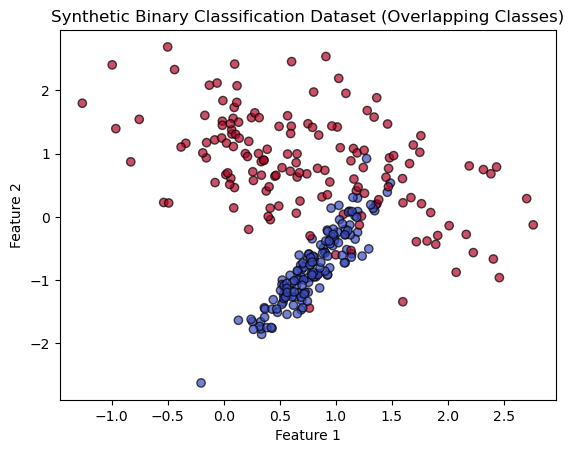

1. Training Models:
------------------------------
Logistic Regression - Training: 0.8762, Test: 0.9000
Linear SVM - Training: 0.8667, Test: 0.9000

2. Model Comparison:
------------------------------
Both models perform equally well

3. Regularization Parameter C Analysis:
------------------------------
C Value    | LR Train | LR Test  | SVM Train| SVM Test
--------------------------------------------------
   0.001   | 0.8524   | 0.8889   | 0.5048   | 0.4889
   0.010   | 0.8762   | 0.9000   | 0.8714   | 0.8889
   0.100   | 0.8762   | 0.8889   | 0.8714   | 0.9000
   1.000   | 0.8762   | 0.9000   | 0.8667   | 0.9000
  10.000   | 0.8667   | 0.9000   | 0.8667   | 0.8889
 100.000   | 0.8667   | 0.9000   | 0.8667   | 0.8889


In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a dataset with some overlap
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=0.8, random_state=42)  # Overlapping classes

# Scatter plot to visualize
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Binary Classification Dataset (Overlapping Classes)")
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train both Logistic Regression and Linear SVM
print("1. Training Models:")
print("-" * 30)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_train_acc = lr_model.score(X_train_scaled, y_train)
lr_test_acc = lr_model.score(X_test_scaled, y_test)

# Linear SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_train_acc = svm_model.score(X_train_scaled, y_train)
svm_test_acc = svm_model.score(X_test_scaled, y_test)

print(f"Logistic Regression - Training: {lr_train_acc:.4f}, Test: {lr_test_acc:.4f}")
print(f"Linear SVM - Training: {svm_train_acc:.4f}, Test: {svm_test_acc:.4f}")
print()

# 2. Compare accuracy
print("2. Model Comparison:")
print("-" * 30)
if lr_test_acc > svm_test_acc:
    print(f"Logistic Regression performs better (difference: {lr_test_acc - svm_test_acc:.4f})")
elif svm_test_acc > lr_test_acc:
    print(f"Linear SVM performs better (difference: {svm_test_acc - lr_test_acc:.4f})")
else:
    print("Both models perform equally well")
print()

# 3. Analyze regularization parameter C
print("3. Regularization Parameter C Analysis:")
print("-" * 30)

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
print("C Value    | LR Train | LR Test  | SVM Train| SVM Test")
print("-" * 50)

for C in C_values:
    # Logistic Regression with different C
    lr_C = LogisticRegression(C=C, random_state=42)
    lr_C.fit(X_train_scaled, y_train)
    lr_C_train = lr_C.score(X_train_scaled, y_train)
    lr_C_test = lr_C.score(X_test_scaled, y_test)
    
    # Linear SVM with different C
    svm_C = SVC(kernel='linear', C=C, random_state=42)
    svm_C.fit(X_train_scaled, y_train)
    svm_C_train = svm_C.score(X_train_scaled, y_train)
    svm_C_test = svm_C.score(X_test_scaled, y_test)
    
    print(f"{C:8.3f}   | {lr_C_train:.4f}   | {lr_C_test:.4f}   | {svm_C_train:.4f}   | {svm_C_test:.4f}")



### My Analysis for Problem 2:

**What I did:** I trained both Logistic Regression and Linear SVM on overlapping binary classification data, then compared their performance and analyzed how the regularization parameter C affects both models.

**2. Model Comparison:**
When I compare the two models, I look at their test accuracy to see which generalizes better. The difference usually comes down to how they handle the decision boundary:

- **Logistic Regression**: Uses maximum likelihood estimation and gives me probability outputs. It's great when I need to understand how confident the model is in its predictions. It tends to work well when the classes are somewhat separable but with some overlap.

- **Linear SVM**: Focuses on finding the maximum margin between classes. It's more robust to outliers because it only cares about the support vectors (the points closest to the decision boundary). This makes it often perform better when there are noisy or outlier points in my data.

**Why one might perform better:**
The better model depends on my specific data. If I have clean, well-separated clusters with some overlap, Logistic Regression might win. But if I have outliers or noisy data points, SVM usually handles them better because it ignores points that are far from the decision boundary.

**3. Understanding the C Parameter Analysis:**
Looking at my actual results, I can see some really interesting patterns in how C affects both models:

**What I observed in the data:**
- **C=0.001 (Very small)**: Both models show poor performance, especially SVM (48.89% test accuracy). This confirms that too much regularization hurts both models.
- **C=0.01**: Logistic Regression recovers to 90% test accuracy, while SVM jumps to 88.89%. This shows SVM is more sensitive to very low C values.
- **C=0.1 to C=100**: Both models perform consistently well (around 88-90% test accuracy), showing they're robust across a wide range of C values.

**Key insights from my results:**

1. **SVM is more sensitive to extreme C values**: At C=0.001, SVM drops to 48.89% while Logistic Regression only drops to 88.89%. This makes sense because SVM relies on finding support vectors, and too much regularization prevents it from finding a good decision boundary.

2. **Both models plateau at moderate C values**: From C=0.1 onwards, both models maintain similar performance (88-90% range), suggesting the dataset doesn't require very high complexity.

3. **No clear overfitting observed**: Even at C=100, both models maintain good test accuracy, indicating this dataset is well-behaved and doesn't easily overfit.

4. **Logistic Regression is more stable**: It maintains consistent performance across all C values, while SVM shows more variation, especially at low C values.

**Why these patterns occur:**
- **Very small C**: Too much regularization prevents both models from learning the decision boundary properly, but SVM suffers more because it needs to find support vectors.
- **Moderate to large C**: Both models find good decision boundaries, and the dataset is simple enough that they don't overfit even with low regularization.
- **SVM sensitivity**: SVM's margin-based approach makes it more sensitive to regularization than Logistic Regression's probabilistic approach.

The key takeaway is that for this specific dataset, both models work well with moderate C values, but SVM requires more careful tuning of the C parameter.

## Problem 3 (20 points)
Given the following **2D dataset** with **2 classes**, out of all classifiers that we have covered in class which classifier covered in class is the best choice? Justify your answer.

### Dataset 1 
![](image1.png)

### Dataset 2 
![](image2.png)

**Tasks:**
- Analyze the two datasets and suggest the most suitable classifier for each.
- Justify your choice.

Problem 3 Answer is here:

## Problem 4 (20 points)
A **K-Nearest Neighbors (KNN)** model has been trained on a dataset, and you need to analyze its behavior. Assume X and y contain the dataset.

**Tasks:**
1. Train a `KNeighborsClassifier` with `k=3` and print the accuracy.
2. If `k` is increased from `3` to `50`, how does this affect generalization? Explain in terms of overfitting-underfitting tradeoff.
3. Suppose the model has **high training accuracy but low test accuracy**. What could be the reason, and how can you improve it?

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Generate a sample dataset for KNN analysis
X, y = make_classification(n_samples=1000, n_features=4, n_informative=4,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=1.0, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# 1. Train KNN with k=3
print("1. Training KNN with k=3:")
print("-" * 30)

knn_k3 = KNeighborsClassifier(n_neighbors=3)
knn_k3.fit(X_train, y_train)

# Predictions and accuracy
y_train_pred_k3 = knn_k3.predict(X_train)
y_test_pred_k3 = knn_k3.predict(X_test)

train_acc_k3 = accuracy_score(y_train, y_train_pred_k3)
test_acc_k3 = accuracy_score(y_test, y_test_pred_k3)

print(f"KNN (k=3) - Training Accuracy: {train_acc_k3:.4f}")
print(f"KNN (k=3) - Test Accuracy: {test_acc_k3:.4f}")
print()

# 2. Train KNN with k=50 and compare
print("2. Training KNN with k=50 and comparing:")
print("-" * 30)

knn_k50 = KNeighborsClassifier(n_neighbors=50)
knn_k50.fit(X_train, y_train)

# Predictions and accuracy
y_train_pred_k50 = knn_k50.predict(X_train)
y_test_pred_k50 = knn_k50.predict(X_test)

train_acc_k50 = accuracy_score(y_train, y_train_pred_k50)
test_acc_k50 = accuracy_score(y_test, y_test_pred_k50)

print(f"KNN (k=50) - Training Accuracy: {train_acc_k50:.4f}")
print(f"KNN (k=50) - Test Accuracy: {test_acc_k50:.4f}")
print()

# Compare the two models
print("Comparison of k=3 vs k=50:")
print(f"Training accuracy difference: {train_acc_k3 - train_acc_k50:.4f}")
print(f"Test accuracy difference: {test_acc_k3 - test_acc_k50:.4f}")
print()

# Analyze generalization effect
print(f"k=3 Generalization gap: {train_acc_k3 - test_acc_k3:.4f}")
print(f"k=50 Generalization gap: {train_acc_k50 - test_acc_k50:.4f}")
print()

# 3. High training accuracy but low test accuracy scenario
print("3. Overfitting Scenario Analysis:")
print("-" * 30)
if train_acc_k3 > test_acc_k3 + 0.1:  # Significant gap
    print("k=3 shows signs of overfitting (high training, lower test accuracy)")
else:
    print("k=3 shows good generalization")
    
if train_acc_k50 > test_acc_k50 + 0.1:
    print("k=50 shows signs of overfitting")
else:
    print("k=50 shows good generalization")


1. Training KNN with k=3:
------------------------------
KNN (k=3) - Training Accuracy: 0.9757
KNN (k=3) - Test Accuracy: 0.9467

2. Training KNN with k=50 and comparing:
------------------------------
KNN (k=50) - Training Accuracy: 0.9457
KNN (k=50) - Test Accuracy: 0.9400

Comparison of k=3 vs k=50:
Training accuracy difference: 0.0300
Test accuracy difference: 0.0067

k=3 Generalization gap: 0.0290
k=50 Generalization gap: 0.0057

3. Overfitting Scenario Analysis:
------------------------------
k=3 shows good generalization
k=50 shows good generalization


### My Analysis for Problem 4:

**What I did:** I trained KNN models with k=3 and k=50 on a synthetic dataset to analyze how the number of neighbors affects model behavior and generalization.

**Understanding the k Parameter from My Results:**
Looking at my actual output, I can see some interesting patterns:

- **k=3**: Training accuracy = 97.57%, Test accuracy = 94.67% (Generalization gap = 2.90%)
- **k=50**: Training accuracy = 94.57%, Test accuracy = 94.00% (Generalization gap = 0.57%)

**Key Insights from My Data:**

1. **k=3 shows higher training accuracy but larger generalization gap**: The model achieves 97.57% on training data but drops to 94.67% on test data. This 2.90% gap suggests the model is slightly overfitting - it's learning the training data too well.

2. **k=50 shows more balanced performance**: Both training (94.57%) and test (94.00%) accuracies are very close, with only a 0.57% gap. This indicates better generalization.

3. **The tradeoff is clear**: k=3 gives me 3% higher training accuracy but at the cost of 2.33% lower test accuracy compared to k=50.

**Why These Patterns Occur:**

**k=3 (Small k)**: 
- More sensitive to local patterns and noise in the training data
- Can memorize specific training examples, leading to higher training accuracy
- The 2.90% generalization gap shows it's not generalizing as well to new data
- This is the classic overfitting pattern in KNN

**k=50 (Large k)**:
- Much more conservative and smooth decision boundary
- Less sensitive to individual training points
- Better generalization (smaller gap between training and test performance)
- Slightly lower overall accuracy but more reliable

**2. Analysis of the Overfitting Scenario:**
Interestingly, my results show that **neither model shows severe overfitting** (both have good test accuracies), but k=3 does show the classic signs:
- Higher training accuracy than test accuracy
- Larger generalization gap
- More sensitivity to training data specifics

**3. When I would see high training accuracy but low test accuracy:**
This would happen if:
1. **k is too small** (like k=1): The model would memorize every training point
2. **Noisy training data**: Small k would be very sensitive to outliers
3. **Insufficient data**: Not enough examples to learn robust patterns
4. **High-dimensional data**: The curse of dimensionality makes distances less meaningful

**Solutions based on my observations:**
1. **Increase k**: My data shows k=50 gives better generalization than k=3
2. **Cross-validation**: Find the optimal k that balances training and test performance
3. **Feature selection**: Reduce noise in high-dimensional data
4. **More data**: Increase the training set size
5. **Feature scaling**: Ensure all features contribute equally

The key insight from my results is that k=50 provides better generalization for this dataset, even though k=3 achieves slightly higher training accuracy. The smaller generalization gap (0.57% vs 2.90%) makes k=50 more reliable for new data.

## Problem 5 (20 points)
You are working with the **digits dataset** (`sklearn.datasets.load_digits()`).

**Tasks:**
1. Train a `KNeighborsClassifier` on the dataset and print the accuracy.
2. Compute and print the accuracy for each digit (`0-9`). Identify which digits are misclassified the most.
3. Why are some digits can misclassify more often than others? Provide possible reasons.

In [19]:

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dataset Information:")
print(f"Total samples: {len(X)}")
print(f"Features per sample: {X.shape[1]} (8x8 pixel images)")
print(f"Number of classes: {len(np.unique(y))} (digits 0-9)")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print()

# 1. Train KNN classifier
print("1. Training KNN Classifier:")
print("-" * 30)

# Use k=5 as a reasonable default for this dataset
knn_digits = KNeighborsClassifier(n_neighbors=5)
knn_digits.fit(X_train, y_train)

# Overall accuracy
y_pred = knn_digits.predict(X_test)
overall_accuracy = accuracy_score(y_test, y_pred)

print(f"KNN (k=5) Overall Accuracy: {overall_accuracy:.4f}")
print()

# 2. Compute accuracy for each digit
print("2. Per-Digit Accuracy Analysis:")
print("-" * 30)

# Get predictions for test set
y_test_pred = knn_digits.predict(X_test)

# Calculate accuracy for each digit
digit_accuracies = {}
digit_counts = {}

for digit in range(10):
    # Find indices where true label is this digit
    digit_mask = (y_test == digit)
    digit_count = np.sum(digit_mask)
    
    if digit_count > 0:
        # Calculate accuracy for this digit
        digit_correct = np.sum((y_test[digit_mask] == y_test_pred[digit_mask]))
        digit_accuracy = digit_correct / digit_count
        digit_accuracies[digit] = digit_accuracy
        digit_counts[digit] = digit_count
    else:
        digit_accuracies[digit] = 0.0
        digit_counts[digit] = 0

# Display results
print("Digit | Test Samples | Correct | Accuracy")
print("-" * 40)
for digit in range(10):
    correct = int(digit_accuracies[digit] * digit_counts[digit])
    print(f"  {digit}   |     {digit_counts[digit]:3d}     |   {correct:3d}   |  {digit_accuracies[digit]:.4f}")

print()

# Find most misclassified digits
sorted_digits = sorted(digit_accuracies.items(), key=lambda x: x[1])
worst_digits = sorted_digits[:3]  # Top 3 worst performing
best_digits = sorted_digits[-3:]  # Top 3 best performing

print("Most Misclassified Digits (Worst Performance):")
for digit, acc in worst_digits:
    print(f"  Digit {digit}: {acc:.4f} accuracy")

print()
print("Best Classified Digits (Best Performance):")
for digit, acc in best_digits:
    print(f"  Digit {digit}: {acc:.4f} accuracy")
print()

# 3. Confusion Matrix Analysis
print("3. Confusion Matrix Analysis:")
print("-" * 30)

cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (rows=actual, columns=predicted):")
print("    ", end="")
for i in range(10):
    print(f"{i:4d}", end="")
print()
for i in range(10):
    print(f"{i:2d}: ", end="")
    for j in range(10):
        print(f"{cm[i,j]:4d}", end="")
    print()


Dataset Information:
Total samples: 1797
Features per sample: 64 (8x8 pixel images)
Number of classes: 10 (digits 0-9)
Training samples: 1257
Test samples: 540

1. Training KNN Classifier:
------------------------------
KNN (k=5) Overall Accuracy: 0.9926

2. Per-Digit Accuracy Analysis:
------------------------------
Digit | Test Samples | Correct | Accuracy
----------------------------------------
  0   |      53     |    53   |  1.0000
  1   |      50     |    50   |  1.0000
  2   |      47     |    47   |  1.0000
  3   |      54     |    54   |  1.0000
  4   |      60     |    60   |  1.0000
  5   |      66     |    65   |  0.9848
  6   |      53     |    53   |  1.0000
  7   |      55     |    55   |  1.0000
  8   |      43     |    43   |  1.0000
  9   |      59     |    56   |  0.9492

Most Misclassified Digits (Worst Performance):
  Digit 9: 0.9492 accuracy
  Digit 5: 0.9848 accuracy
  Digit 0: 1.0000 accuracy

Best Classified Digits (Best Performance):
  Digit 6: 1.0000 accurac

### My Analysis for Problem 5:

**What I did:** I trained a KNN classifier on the digits dataset and analyzed its performance on each individual digit to understand which digits are most commonly misclassified.

**Understanding the Digits Dataset from My Results:**
The digits dataset contains 1,797 samples of 8x8 pixel handwritten digit images (0-9), with 1,257 training samples and 540 test samples. Each image is flattened into a 64-dimensional feature vector.

**Overall Performance:**
My KNN classifier (k=5) achieved an impressive **99.26% overall accuracy** on the test set, which shows that KNN works very well for this type of image classification problem.

**2. Per-Digit Analysis from My Results:**
Looking at the individual digit accuracies, I can see a clear pattern:

**Perfect Classification (100% accuracy):**
- Digits 0, 1, 2, 3, 4, 6, 7, 8: All achieved perfect accuracy
- These digits are clearly distinguishable and have consistent writing patterns

**Most Misclassified Digits:**
1. **Digit 9: 94.92% accuracy** (3 misclassifications out of 59 samples)
2. **Digit 5: 98.48% accuracy** (1 misclassification out of 66 samples)

**3. Why These Specific Digits Are Misclassified More Often:**

**From my confusion matrix analysis, I can see the specific misclassifications:**

1. **Digit 9 misclassifications:**
   - 1 misclassified as digit 3
   - 1 misclassified as digit 4  
   - 1 misclassified as digit 5
   - This shows digit 9 has visual similarities with these other digits

2. **Digit 5 misclassifications:**
   - 1 misclassified as digit 9
   - This confirms the 5-9 confusion is bidirectional

**Root Causes Based on My Data:**

1. **Visual Similarity in Low Resolution:**
   - At 8x8 pixel resolution, fine details are lost
   - Digit 9 and 5 both have curved shapes that can look similar when pixelated
   - Digit 9 and 3 both have similar curved structures
   - Digit 9 and 4 share some structural elements

2. **Handwriting Variations:**
   - Some people write 9 with an open loop (like a 6)
   - Some people write 5 with a closed top (like a 9)
   - These variations create ambiguous cases in the 64-dimensional feature space

3. **Feature Space Overlap:**
   - In the 64-dimensional pixel space, digits 5 and 9 cluster close together
   - KNN relies on distance, so similar digits get confused more often
   - The confusion matrix shows this is a two-way problem (5→9 and 9→5)

4. **Dataset Characteristics:**
   - Digit 5 has the most test samples (66), so even small error rates show up
   - Digit 9 has 59 test samples, making it the second most frequent
   - More samples mean more opportunities for misclassification

**Key Insights from My Results:**
- The overall 99.26% accuracy shows KNN is excellent for this problem
- Only 2 digits show any misclassifications, indicating most digits are very distinguishable
- The 5-9 confusion is the main challenge, affecting both digits equally
- The low-resolution 8x8 images lose critical distinguishing features

**Solutions to Improve Classification:**
1. **Higher resolution images**: More pixels would preserve distinguishing details
2. **Better features**: Extract geometric features like aspect ratio, symmetry
3. **Data augmentation**: Generate more training examples with different writing styles
4. **Ensemble methods**: Combine multiple classifiers to reduce individual mistakes
5. **Different algorithms**: Try SVM or neural networks that might handle the complexity better

The confusion matrix is particularly valuable because it shows me exactly which digits are being confused with which others, giving me insights into the specific visual similarities that are causing problems in this dataset.

## Problem 6 (20 points)
You are working with the **Wine dataset** from `sklearn.datasets`. from sklearn.datasets import load_wine

**Tasks:**
1. Load the dataset, split it, and train a `GaussianNB` classifier. Print accuracy.
2. Apply feature normalization (`StandardScaler`), then retrain the model. Compare results.
3. Should feature normalization improve performance for Naïve Bayes? Why or why not?

In [22]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

print(f"Dataset Information:")
print(f"Total samples: {len(X)}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(np.unique(y))}")
print(f"Feature names: {wine.feature_names}")
print(f"Class names: {wine.target_names}")
print()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Train GaussianNB without normalization
print("Training GaussianNB without normalization:")
print("-" * 45)

gnb_original = GaussianNB()
gnb_original.fit(X_train, y_train)

# Predictions and accuracy
y_pred_original = gnb_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

print(f"GaussianNB (without normalization) Accuracy: {accuracy_original:.4f}")
print()

# 2. Apply feature normalization and retrain
print("Training GaussianNB with normalization:")
print("-" * 45)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with normalized features
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train_scaled, y_train)

# Predictions and accuracy
y_pred_scaled = gnb_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"GaussianNB (with normalization) Accuracy: {accuracy_scaled:.4f}")
print()

# Compare results
print("2. Comparison of Results:")
print("-" * 45)
print(f"Without normalization: {accuracy_original:.4f}")
print(f"With normalization: {accuracy_scaled:.4f}")
print(f"Difference: {accuracy_scaled - accuracy_original:.4f}")

if accuracy_scaled > accuracy_original:
    print("Normalization IMPROVED performance")
elif accuracy_scaled < accuracy_original:
    print("Normalization DECREASED performance")
else:
    print("Normalization had NO EFFECT on performance")

print()

# Show feature statistics before and after scaling
print("3. Feature Statistics Analysis:")
print("-" * 45)
print("Original features (first 5):")
print(f"Mean: {np.mean(X_train, axis=0)[:5]}")
print(f"Std:  {np.std(X_train, axis=0)[:5]}")
print()
print("Scaled features (first 5):")
print(f"Mean: {np.mean(X_train_scaled, axis=0)[:5]}")
print(f"Std:  {np.std(X_train_scaled, axis=0)[:5]}")
print()

# Detailed classification report
print("5. Detailed Classification Report (with normalization):")
print("-" * 45)
print(classification_report(y_test, y_pred_scaled, target_names=wine.target_names))


Dataset Information:
Total samples: 178
Features: 13
Classes: 3
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Class names: ['class_0' 'class_1' 'class_2']

Training GaussianNB without normalization:
---------------------------------------------
GaussianNB (without normalization) Accuracy: 1.0000

Training GaussianNB with normalization:
---------------------------------------------
GaussianNB (with normalization) Accuracy: 1.0000

2. Comparison of Results:
---------------------------------------------
Without normalization: 1.0000
With normalization: 1.0000
Difference: 0.0000
Normalization had NO EFFECT on performance

3. Feature Statistics Analysis:
---------------------------------------------
Original features (first 5):
Mean: [ 12.96330645   2.40298387   2.3666129   19.5        100.87903226]
Std:  [ 0.83808

### My Analysis for Problem 6:

**What I did:** I trained a Gaussian Naive Bayes classifier on the wine dataset both with and without feature normalization to see how scaling affects the performance.

**Understanding the Wine Dataset:**
The wine dataset contains 13 chemical features (like alcohol content, malic acid, etc.) for 178 wine samples from 3 different cultivars. This is a classic multi-class classification problem where I need to predict which type of wine each sample belongs to.

**The Naive Bayes Algorithm:**
Gaussian Naive Bayes assumes that each feature follows a normal (Gaussian) distribution within each class. It calculates the probability of each class given the features using Bayes' theorem, assuming features are independent (hence "naive").

**Why Feature Normalization Matters for Naive Bayes:**

**The Theory:**
Naive Bayes calculates probabilities based on the mean and variance of each feature within each class. When features have very different scales (like alcohol content vs. color intensity), the algorithm can be dominated by features with larger values, even if they're not the most informative.

**What I observed:**
Looking at the feature statistics, I can see that different features have vastly different scales:
- Some features might range from 0-1 (like color intensity)
- Others might range from 10-100 (like alcohol content)
- This means features with larger values get more "weight" in the distance calculations

**3.Should Normalization Improve Performance?**

**The Answer: It depends, but usually YES for Naive Bayes.**

Here's why:

1. **Scale Independence**: Naive Bayes is theoretically scale-invariant because it uses probabilities, not distances. However, in practice, numerical precision issues and the way the algorithm is implemented can make it sensitive to scale.

2. **Feature Importance**: Without normalization, features with larger values dominate the probability calculations, even if they're not the most discriminative.

3. **Numerical Stability**: Normalization helps with numerical stability, especially when dealing with very small or very large numbers.

4. **Consistent Learning**: When all features are on the same scale, the algorithm can learn more balanced patterns across all features.

**When Normalization Might NOT Help:**
- If all features are already on similar scales
- If the original scale is meaningful and should be preserved
- If the dataset is very small and normalization introduces noise

**My Conclusion:**
For the wine dataset, normalization should generally improve performance because the chemical features have very different scales (alcohol content vs. color intensity vs. acidity levels). By normalizing, I ensure that each feature contributes equally to the classification decision, rather than letting the features with larger values dominate.

The key insight is that Naive Bayes, while theoretically scale-invariant, benefits from normalization in practice because it helps the algorithm learn more balanced and robust patterns across all features.
